In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

# Cambia 'nombre_del_archivo.csv' por el nombre del archivo que descargaste de Kaggle
archivo = r'C:\Maestria\Taller_2_Fundamentos\DATASET\HOTELES.xlsx'  

# Carga el archivo en un DataFrame
datos = pd.read_excel(r'C:\Maestria\Taller_2_Fundamentos\DATASET\HOTELES.xlsx' )

# Muestra las primeras filas para verificar que se haya leído correctamente
print(datos.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1       

In [228]:
print(datos.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   
std         0.482918     106.863097           0.707476   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000            

In [229]:
print(datos.head)

<bound method NDFrame.head of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   


In [230]:
print(datos.describe()) 

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   
std         0.482918     106.863097           0.707476   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000            

LIMPIEZA DE DATOS

In [231]:
# Revisar valores nulos
print(datos.isnull().sum())


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [232]:
# Alternativa 2: Usando el método con un diccionario
datos.update({"children": datos["children"].fillna(0)})

In [233]:
datos.update({"country": datos["country"].fillna("Unknown")})

In [234]:
datos["agent"] = datos["agent"].fillna(0)
datos["company"] = datos["company"].fillna(0)

In [235]:
filter = (datos.children == 0) & (datos.adults == 0) & (datos.babies == 0)
datos[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [236]:
print(datos.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [237]:
print(datos.info())
print(datos.describe())  # Estadísticas numéricas
print(datos.head())      # Primeras filas del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

In [238]:
print(datos.dtypes)

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [239]:
datos["arrival_date"] = pd.to_datetime(datos[["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"]].astype(str).agg('-'.join, axis=1))

In [240]:
categorical_columns = ["meal", "country", "market_segment", "distribution_channel",
                       "reserved_room_type", "assigned_room_type", "deposit_type",
                       "customer_type", "reservation_status"]

datos[categorical_columns] = datos[categorical_columns].astype("category")

In [241]:
datos[["agent", "children", "company"]] = datos[["agent", "children", "company"]].astype('Int64')

In [242]:
print(datos[["agent", "children", "company"]].dtypes)

agent       Int64
children    Int64
company     Int64
dtype: object


In [243]:
datos["is_canceled"] = datos["is_canceled"].astype(bool)
datos["is_repeated_guest"] = datos["is_repeated_guest"].astype(bool)

In [244]:
datos.to_excel("./DATASET/df.xlsx", index=False)  

In [245]:

df_final = pd.read_excel("./DATASET/df.xlsx", engine='openpyxl')

print("=== Tipos de datos ===")
print(df_final.dtypes)

=== Tipos de datos ===
hotel                                     object
is_canceled                                 bool
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                           bool
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        obje

In [246]:
categorical_columns = ["meal", "country", "market_segment", "distribution_channel",
                       "reserved_room_type", "assigned_room_type", "deposit_type",
                       "customer_type", "reservation_status"]

df_final[categorical_columns] = df_final[categorical_columns].astype("category")

In [247]:
print("=== Tipos de datos ===")
print(df_final.dtypes)

=== Tipos de datos ===
hotel                                     object
is_canceled                                 bool
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                           bool
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                      catego

In [248]:
# Requiere pyarrow o fastparquet (pip install pyarrow)
df_final.to_parquet("df_final.parquet", engine="pyarrow", index=False)

In [249]:
df_final = pd.read_parquet("df_final.parquet")
print(df_final.dtypes)  # Las columnas deben ser 'category'

hotel                                     object
is_canceled                                 bool
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                           bool
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                      category
assigned_room_type  

In [250]:
# Guardar (una sola vez)
import pandas as pd
df_final[categorical_columns] = df_final[categorical_columns].astype("category")
df_final.to_parquet("df_final.parquet")

# Cargar (en cualquier momento futuro)
df_final = pd.read_parquet("df_final.parquet")  # Tipos intactos


In [251]:
print(df_final.dtypes)

hotel                                     object
is_canceled                                 bool
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                           bool
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                      category
assigned_room_type  

EDA

In [252]:
# Primeras filas
print(df_final.head())

# Información general (tipos, nulos)
print(df_final.info())

# Estadísticas descriptivas
print(df_final.describe(include='all'))  # Incluye categóricas

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel        False        342               2015               July   
1  Resort Hotel        False        737               2015               July   
2  Resort Hotel        False          7               2015               July   
3  Resort Hotel        False         13               2015               July   
4  Resort Hotel        False         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2         0       0   
1       

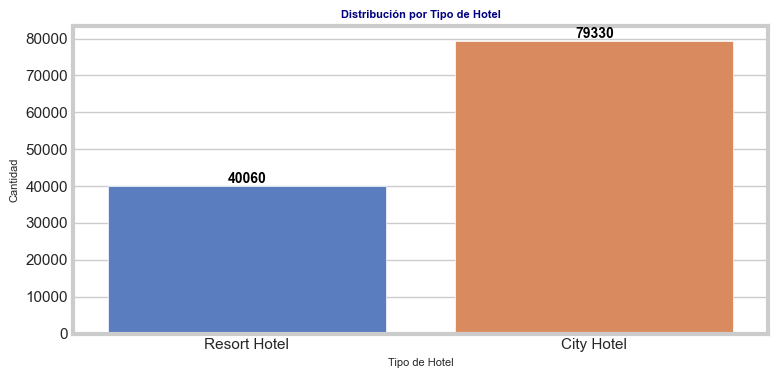

In [253]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer un estilo profesional
sns.set_style("whitegrid")

# Crear el gráfico con ajustes
plt.figure(figsize=(8, 4))  # Ajustar el tamaño del gráfico
ax = sns.countplot(data=df_final, x='hotel', palette="muted")  # Usar una paleta atractiva

# Agregar etiquetas y título estilizado
ax.set_title('Distribución por Tipo de Hotel', fontsize=8, fontweight='bold', color='navy')
ax.set_xlabel('Tipo de Hotel', fontsize=8)
ax.set_ylabel('Cantidad', fontsize=8)

# Agregar valores encima de las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', 
                fontsize=10, color='black', fontweight='bold')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [254]:
# Conteo de reservas
counts = df_final['hotel'].value_counts()
print("Frecuencia absoluta:\n", counts)

# Porcentajes
percentages = df_final['hotel'].value_counts(normalize=True) * 100
print("\nFrecuencia relativa (%):\n", percentages.round(1))

Frecuencia absoluta:
 hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

Frecuencia relativa (%):
 hotel
City Hotel      66.4
Resort Hotel    33.6
Name: proportion, dtype: float64


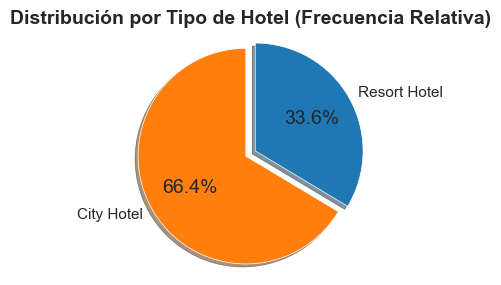

In [255]:
import matplotlib.pyplot as plt

# Datos
labels = ['City Hotel', 'Resort Hotel']
sizes = [66.4, 33.6]
colors = ['#ff7f0e', '#1f77b4']  # Colores personalizados
explode = (0.1, 0)  # Destacar el primer sector

# Crear el gráfico de pastel
plt.figure(figsize=(5, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
plt.title('Distribución por Tipo de Hotel (Frecuencia Relativa)', fontsize=14, fontweight='bold')
plt.axis('equal')  # Asegurar que el gráfico sea un círculo
plt.show()

In [256]:
import pandas as pd


# Calcular la tasa de cancelación por tipo de hotel
tasa_cancelacion = df_final.groupby('hotel')['is_canceled'].mean() * 100

# Mostrar el resultado
print(tasa_cancelacion)

hotel
City Hotel      41.726963
Resort Hotel    27.763355
Name: is_canceled, dtype: float64


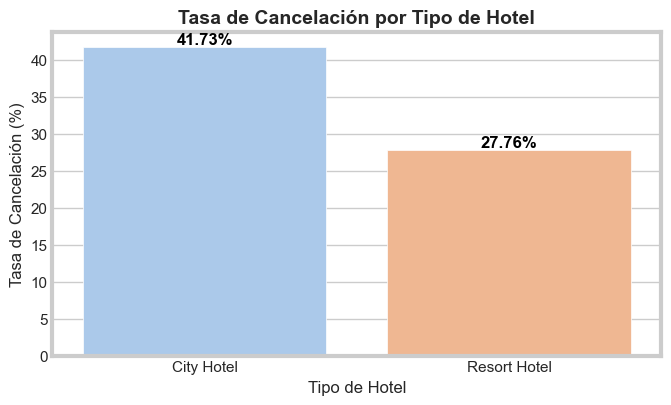

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de usar el orden correcto basado en los datos
custom_order = ['City Hotel', 'Resort Hotel']  # Orden correcto según los datos

# Crear el gráfico de barras
plt.figure(figsize=(7, 4))
ax = sns.barplot(x=tasa_cancelacion.index, y=tasa_cancelacion.values, palette="pastel", order=custom_order)

# Agregar porcentajes encima de las barras
for i, p in enumerate(ax.patches):
    ax.annotate(f'{tasa_cancelacion.values[i]:.2f}%',  # Mostrar el valor correcto
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Etiquetas y título
plt.title('Tasa de Cancelación por Tipo de Hotel', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Hotel', fontsize=12)
plt.ylabel('Tasa de Cancelación (%)', fontsize=12)

# Mostrar el gráfico
plt.show()

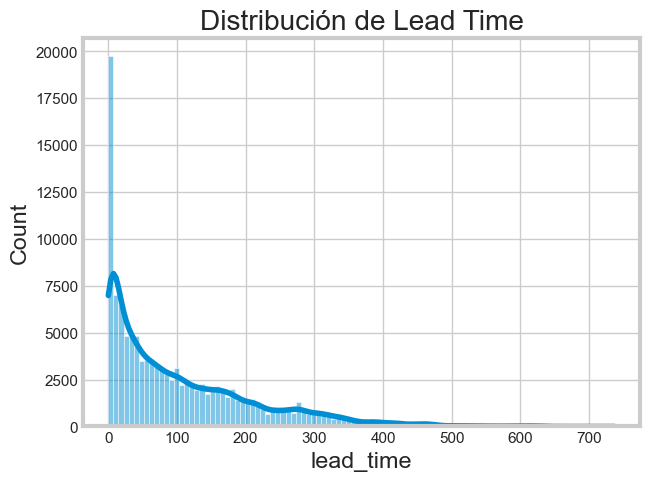

In [258]:
sns.histplot(data=df_final, x='lead_time', bins=100, kde=True)
plt.title('Distribución de Lead Time');

In [259]:
import pandas as pd

# Estadísticas básicas
lead_time_stats = df_final['lead_time'].describe(percentiles=[0.5, 0.75])
print(lead_time_stats)

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64


Media: 104 días
Máximo: 737 días
75% de reservas: ≤160 días

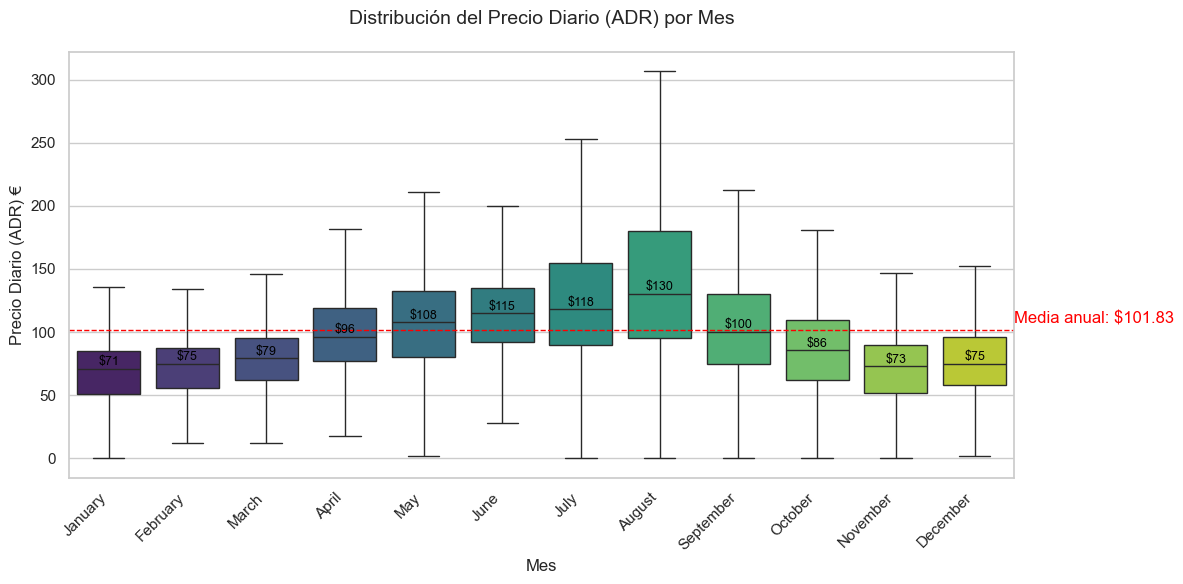

In [260]:


# Configurar el estilo
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Crear el boxplot mejorado
boxplot = sns.boxplot(
    data=df_final,
    x='arrival_date_month',
    y='adr',
    order=['January','February','March','April','May','June',
           'July','August','September','October','November','December'],
    palette="viridis",
    showfliers=False  # Ocultar outliers para mayor claridad
)

# Mejorar títulos y etiquetas
plt.title('Distribución del Precio Diario (ADR) por Mes', fontsize=14, pad=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Precio Diario (ADR) €', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor lectura

# Añadir línea de promedio general
mean_adr = df_final['adr'].mean()
plt.axhline(mean_adr, color='red', linestyle='--', linewidth=1)
plt.text(11.5, mean_adr+5, f'Media anual: ${mean_adr:.2f}', color='red')

# Añadir valores importantes
medians = df_final.groupby('arrival_date_month')['adr'].median()
for i, month in enumerate(['January','February','March','April','May','June',
                          'July','August','September','October','November','December']):
    plt.text(i, medians[month]+5, f'${medians[month]:.0f}', 
             ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

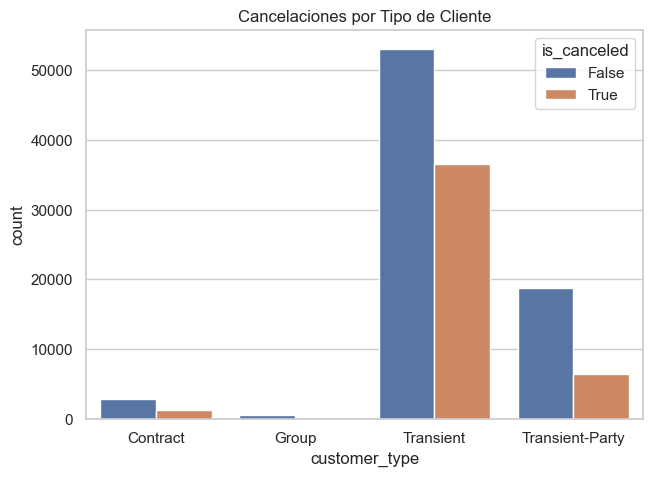

In [261]:
sns.countplot(data=df_final, x='customer_type', hue='is_canceled')
plt.title('Cancelaciones por Tipo de Cliente');

In [262]:
# Calcular el porcentaje global de cancelaciones por tipo de cliente
porcentaje_global = df_final[df_final['is_canceled'] == 1]['customer_type'].value_counts(normalize=True) * 100
print(porcentaje_global)

customer_type
Transient          82.566027
Transient-Party    14.446907
Contract            2.853654
Group               0.133412
Name: proportion, dtype: float64


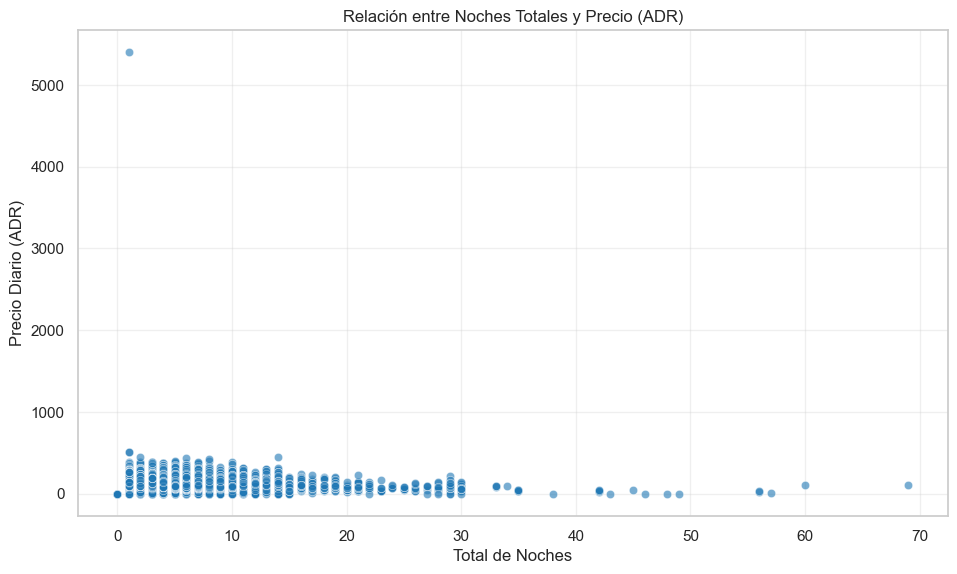

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar si la columna existe o crearla
if 'total_nights' not in df_final.columns:
    df_final['total_nights'] = df_final['stays_in_week_nights'] + df_final['stays_in_weekend_nights']

# Crear el gráfico con manejo de errores
try:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df_final,
        x='total_nights',
        y='adr',
        alpha=0.6,
        color='#1f77b4'
    )
    plt.title('Relación entre Noches Totales y Precio (ADR)')
    plt.xlabel('Total de Noches')
    plt.ylabel('Precio Diario (ADR)')
    plt.grid(True, alpha=0.3)
    plt.show()
    
except Exception as e:
    print(f"Error al crear el gráfico: {e}")
    print("Columnas disponibles:", df_final.columns.tolist())

In [264]:
short_stays = df_final[df_final['total_nights'] <= 7]
print(short_stays.shape[0], "estancias cortas de 1-7 noches.")

114133 estancias cortas de 1-7 noches.


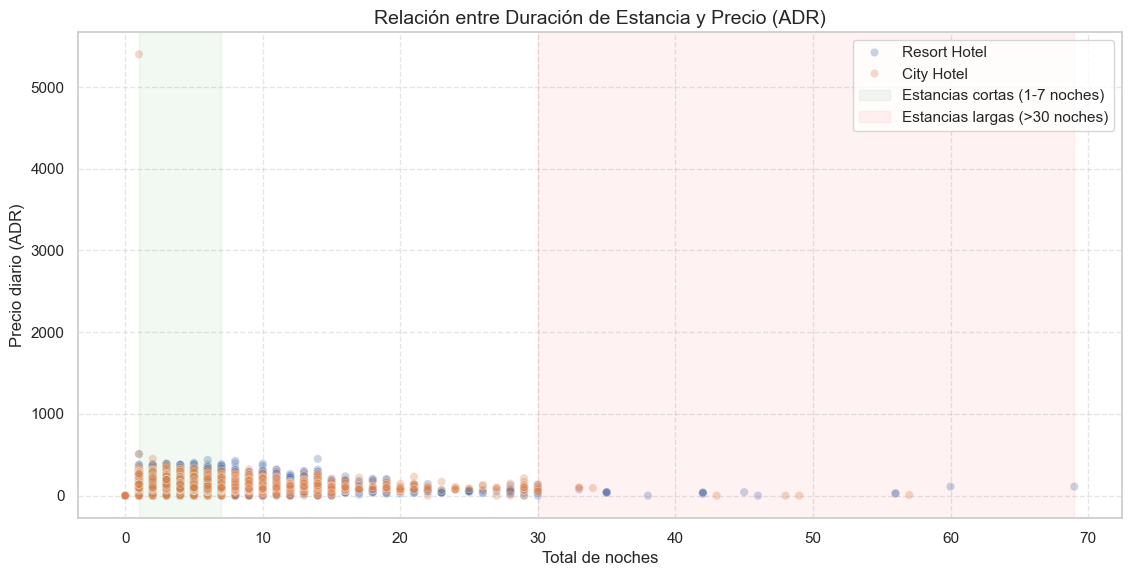

In [265]:
plt.figure(figsize=(12, 6))

# Gráfico principal
sns.scatterplot(data=df_final, x='total_nights', y='adr', alpha=0.3, hue='hotel')

# Resaltar zonas clave
plt.axvspan(1, 7, color='green', alpha=0.05, label='Estancias cortas (1-7 noches)')
plt.axvspan(30, df_final['total_nights'].max(), color='red', alpha=0.05, label='Estancias largas (>30 noches)')

# Ajustes estéticos
plt.title('Relación entre Duración de Estancia y Precio (ADR)', fontsize=14)
plt.xlabel('Total de noches', fontsize=12)
plt.ylabel('Precio diario (ADR)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [266]:
# Distribución de estancias
print(df_final['total_nights'].describe(percentiles=[0.25, 0.5, 0.75, 0.95]))

# Top 5 estancias más largas
print("\nTop 5 estancias más largas:")
print(df_final.nlargest(5, 'total_nights')[['total_nights', 'adr', 'hotel']])

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
95%           7.000000
max          69.000000
Name: total_nights, dtype: float64

Top 5 estancias más largas:
        total_nights     adr         hotel
14038             69  110.00  Resort Hotel
14037             60  110.50  Resort Hotel
101794            57    8.34    City Hotel
9839              56   25.50  Resort Hotel
33924             56   28.79  Resort Hotel


In [267]:
# Filtrar solo diciembre y calcular estadísticas
diciembre_stats = df_final[df_final['arrival_date_month'] == 'December']['adr'].describe()
print("Estadísticas de precios en Diciembre:\n", diciembre_stats)

# Comparar con el promedio anual
print("\nPromedio anual:", df_final['adr'].mean())

Estadísticas de precios en Diciembre:
 count    6780.000000
mean       81.076776
std        42.731774
min         0.000000
25%        58.275000
50%        75.000000
75%        96.000000
max       451.500000
Name: adr, dtype: float64

Promedio anual: 101.83112153446686


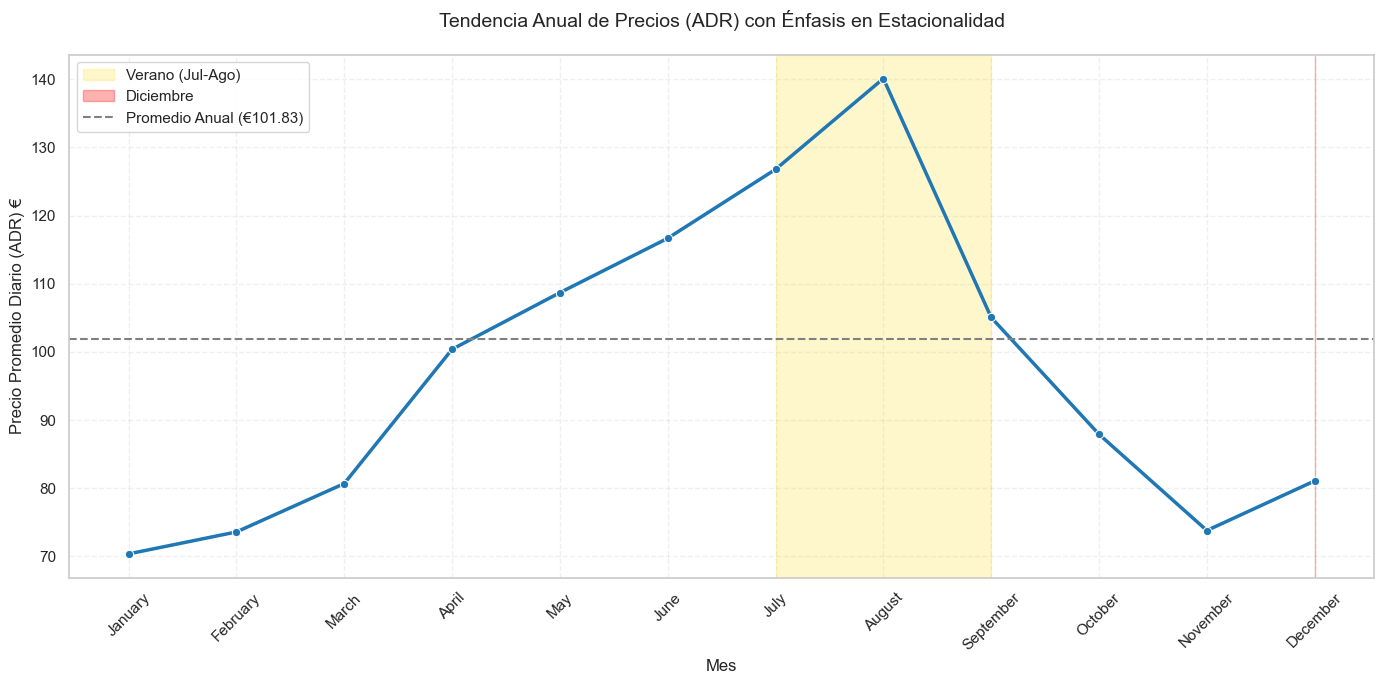

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 7))

# Calcular promedios mensuales
monthly_avg = df_final.groupby('arrival_date_month')['adr'].mean().reset_index()

# Ordenar meses cronológicamente
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg['arrival_date_month'] = pd.Categorical(monthly_avg['arrival_date_month'], 
                                          categories=months_order, 
                                          ordered=True)
monthly_avg = monthly_avg.sort_values('arrival_date_month')

# Crear gráfico de líneas con puntos
sns.lineplot(data=monthly_avg, x='arrival_date_month', y='adr', 
             marker='o', linewidth=2.5, color='#1f77b4')

# Resaltar periodos clave
plt.axvspan(6, 8, color='gold', alpha=0.2, label='Verano (Jul-Ago)')
plt.axvspan(11, 11, color='red', alpha=0.3, label='Diciembre')

# Añadir referencia de promedio anual
annual_avg = df_final['adr'].mean()
plt.axhline(annual_avg, color='gray', linestyle='--', label=f'Promedio Anual (€{annual_avg:.2f})')

# Personalización
plt.title('Tendencia Anual de Precios (ADR) con Énfasis en Estacionalidad', fontsize=14, pad=20)
plt.xlabel('Mes')
plt.ylabel('Precio Promedio Diario (ADR) €')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

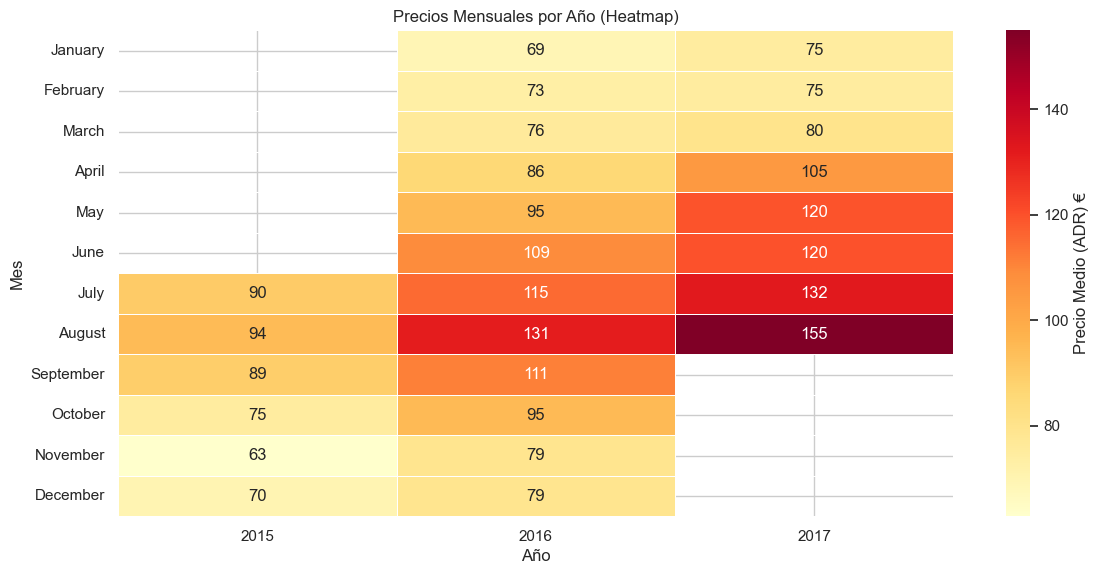

In [269]:
# Crear tabla pivote (mes vs año)
pivot_table = df_final.pivot_table(values='adr', 
                                  index='arrival_date_month', 
                                  columns='arrival_date_year', 
                                  aggfunc='median')

# Ordenar meses
pivot_table = pivot_table.reindex(months_order)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt=".0f", 
            linewidths=0.5, cbar_kws={'label': 'Precio Medio (ADR) €'})
plt.title('Precios Mensuales por Año (Heatmap)')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.show()

In [270]:
# Resultado esperado en un patrón estacional claro
print(monthly_avg.sort_values('adr', ascending=False).head(3))

  arrival_date_month         adr
1             August  140.111523
5               July  126.788013
6               June  116.672192


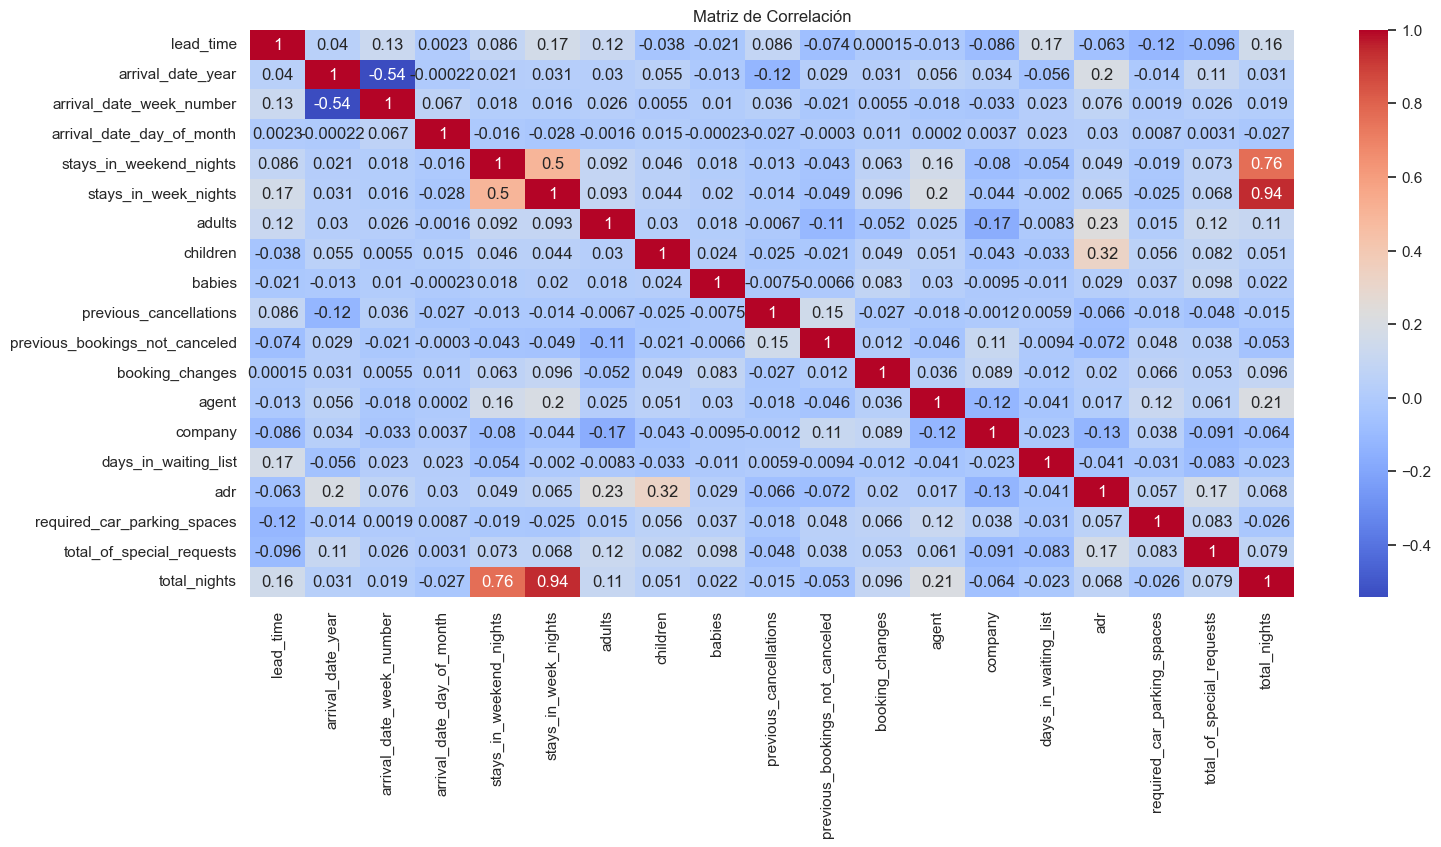

In [271]:
numeric_cols = df_final.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 7))  # Tamaño del gráfico
sns.heatmap(df_final[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

<Axes: >

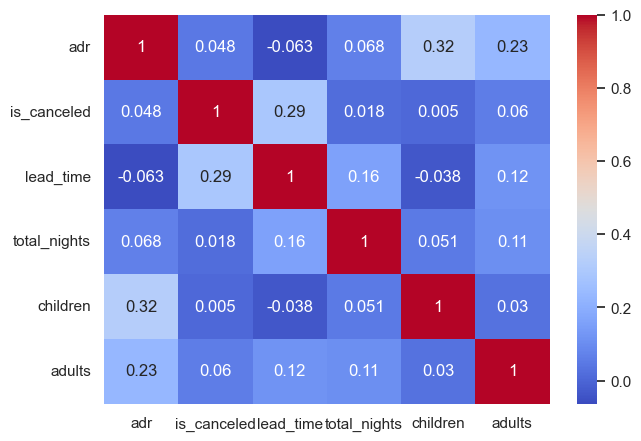

In [272]:
# Enfoque en variables clave
variables_clave = ['adr', 'is_canceled', 'lead_time', 'total_nights', 'children', 'adults']
sns.heatmap(df_final[variables_clave].corr(), annot=True, cmap='coolwarm')

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas clave
numeric_vars = ['adr', 'lead_time', 'total_nights', 'adults', 'children']

# Función para calcular outliers
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Análisis por variable
for var in numeric_vars:
    outliers = find_outliers(df_final[var])
    print(f"\n🔍 **{var}**: {len(outliers)} outliers ({len(outliers)/len(df_final)*100:.2f}%)")
    print(outliers.describe())


🔍 **adr**: 3793 outliers (3.18%)
count    3793.000000
mean      247.949586
std        89.806056
min       211.080000
25%       224.000000
50%       237.000000
75%       260.000000
max      5400.000000
Name: adr, dtype: float64

🔍 **lead_time**: 3005 outliers (2.52%)
count    3005.000000
mean      443.809983
std        62.532480
min       374.000000
25%       395.000000
50%       423.000000
75%       468.000000
max       737.000000
Name: lead_time, dtype: float64

🔍 **total_nights**: 5257 outliers (4.40%)
count    5257.000000
mean       11.326612
std         4.326219
min         8.000000
25%         9.000000
50%        10.000000
75%        14.000000
max        69.000000
Name: total_nights, dtype: float64

🔍 **adults**: 29710 outliers (24.88%)
count    29710.000000
mean         1.422955
std          1.047994
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         55.000000
Name: adults, dtype: float64

🔍 **children**: 8590 outliers (7.19%)
cou

In [274]:
print(pd.crosstab(df_final['children'] > 0, df_final['meal']))

meal         BB   FB     HB     SC  Undefined
children                                     
False     85231  732  13217  10494       1126
True       7079   66   1246    156         43


In [275]:
# Rentabilidad por tipo de comida
profit_by_meal = df_final.groupby('meal').apply(
    lambda x: (x['adr'] * x['total_nights']).mean()
).sort_values(ascending=False)
profit_by_meal = profit_by_meal.apply(lambda x: f"${x:,.2f}")
print(profit_by_meal)

meal
HB           $532.46
FB           $513.37
Undefined    $420.50
BB           $337.70
SC           $276.81
dtype: object


In [276]:
# Total de países únicos y distribución
print(f"Países únicos: {df_final['country'].nunique()}")
print(df_final['country'].value_counts(normalize=True).head(10) * 100)

Países únicos: 178
country
PRT    40.698551
GBR    10.159142
FRA     8.723511
ESP     7.176480
DEU     6.103526
ITA     3.154368
IRL     2.826870
BEL     1.961638
BRA     1.862803
NLD     1.762292
Name: proportion, dtype: float64


In [277]:
price_by_country = df_final.groupby('country')['adr'].median().sort_values(ascending=False).head(5)
print(price_by_country)

country
DJI    273.000
AIA    265.000
AND    228.570
UMI    200.000
LAO    181.665
Name: adr, dtype: float64


In [278]:
country_wise_guests = df_final[df_final['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
173,FJI,0
174,MYT,0
175,NIC,0
176,UMI,0


In [279]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

APLICACION DE MODELOS DE ACUERDO A LOS OBJETIVOS

In [280]:
# Cargar (en cualquier momento futuro)
df_final = pd.read_parquet("df_final.parquet")  # Tipos intactos

In [281]:
print(df_final.head)

<bound method NDFrame.head of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel        False        342               2015   
1       Resort Hotel        False        737               2015   
2       Resort Hotel        False          7               2015   
3       Resort Hotel        False         13               2015   
4       Resort Hotel        False         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel        False         23               2017   
119386    City Hotel        False        102               2017   
119387    City Hotel        False         34               2017   
119388    City Hotel        False        109               2017   
119389    City Hotel        False        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   


In [282]:
# Mostrar primeras filas y resumen
print(df_final.head())
print("\nInformación del dataframe:")
print(df_final.info())
print("\nEstadísticas descriptivas:")
print(df_final.describe(include='all'))

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel        False        342               2015               July   
1  Resort Hotel        False        737               2015               July   
2  Resort Hotel        False          7               2015               July   
3  Resort Hotel        False         13               2015               July   
4  Resort Hotel        False         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2         0       0   
1       

In [283]:
# Convertir variables importantes
df_final['is_canceled'] = df_final['is_canceled'].astype(int)  # Para modelado
df_final['total_nights'] = df_final['stays_in_weekend_nights'] + df_final['stays_in_week_nights']
df_final['arrival_date_month'] = pd.to_datetime(df_final['arrival_date_month'], format='%B').dt.month

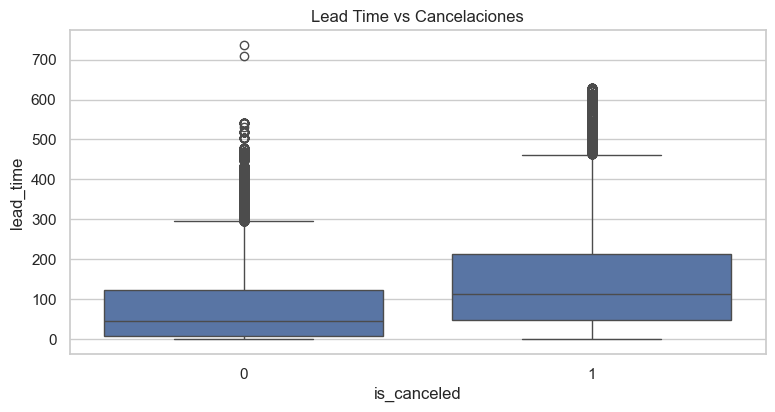

In [284]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='is_canceled', y='lead_time', data=df_final)
plt.title('Lead Time vs Cancelaciones')
plt.show()

In [285]:
from sklearn.preprocessing import LabelEncoder

# Codificación de variables categóricas específicas
le = LabelEncoder()
df_final['hotel_encoded'] = le.fit_transform(df_final['hotel'])
df_final['customer_type_encoded'] = le.fit_transform(df_final['customer_type'])

# One-Hot Encoding para otras categóricas
df_final = pd.get_dummies(df_final, columns=['deposit_type', 'meal'])

In [286]:
features = [
    'hotel_encoded', 'lead_time', 'arrival_date_month',
    'total_nights', 'adr', 'required_car_parking_spaces',
    'total_of_special_requests', 'customer_type_encoded',
    'previous_cancellations', 'booking_changes'
]

X = df_final[features]
y = df_final['is_canceled']

In [287]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [288]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42
)

In [289]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluación
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     22669
           1       0.85      0.84      0.85     22431

    accuracy                           0.85     45100
   macro avg       0.85      0.85      0.85     45100
weighted avg       0.85      0.85      0.85     45100

AUC-ROC: 0.8493080900327196


In [290]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)

# Evaluación
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81     22669
           1       0.82      0.77      0.80     22431

    accuracy                           0.80     45100
   macro avg       0.81      0.80      0.80     45100
weighted avg       0.81      0.80      0.80     45100



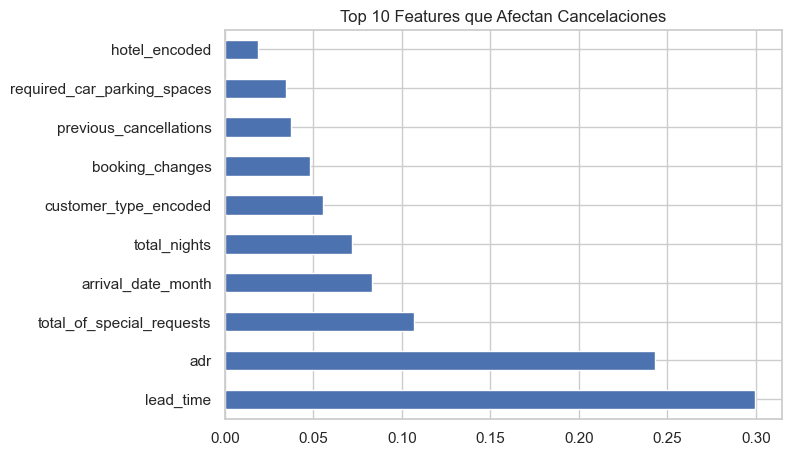

In [291]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features que Afectan Cancelaciones')
plt.show()

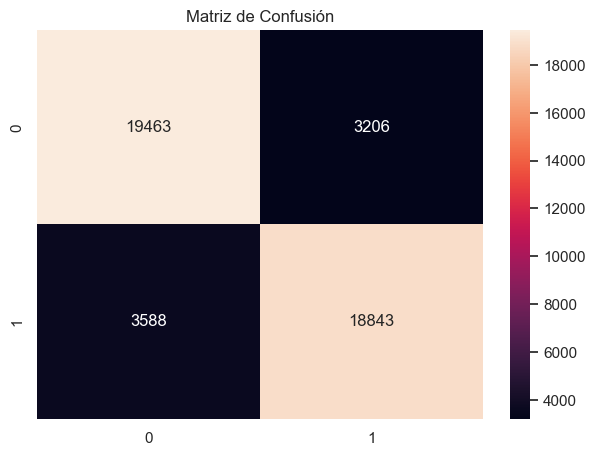

In [292]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusión')
plt.show()

In [293]:
print(df_final.head)


<bound method NDFrame.head of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

        arrival_date_month  arrival_date_week_number  \
0                        7                        27   
1                        7                        27 

In [294]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Suponiendo que ya tienes y_test, y las predicciones:
# y_pred_rf para Random Forest
# y_pred_xgb para XGBoost

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame({
    'Modelo': ['Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred_xgb)
    ],
    'Recall': [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_xgb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_xgb)
    ]
})

# Mostrar la tabla ordenada por F1-Score
metrics_df.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)


,Modelo,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.849357,0.854597,0.840043,0.847257
1,XGBoost,0.804745,0.823557,0.773037,0.797498


In [295]:
# Calcular la distribución de la variable is_canceled
cancel_distribution = df_final['is_canceled'].value_counts(normalize=True) * 100

# Imprimir los resultados
print("Distribución de la variable is_canceled (%):")
print(cancel_distribution)

Distribución de la variable is_canceled (%):
is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64


R²: 0.74
MAE: $14.05


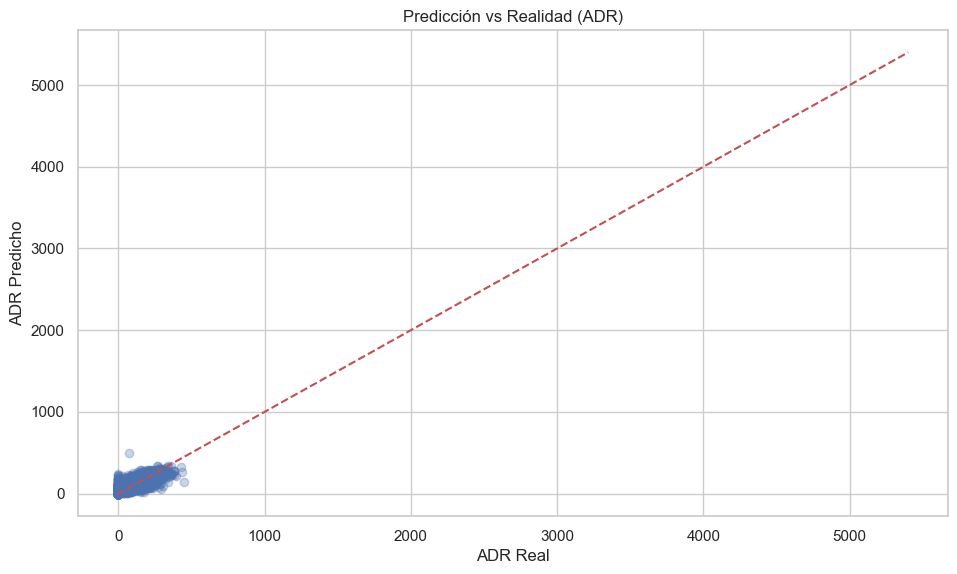

In [296]:
import pandas as pd  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_absolute_error, r2_score  
import matplotlib.pyplot as plt  

# 1. Preparación de datos  
df = df_final.copy()  

# Feature Engineering  
df['total_guests'] = df['adults'] + df['children']  
df['is_weekend'] = df['arrival_date_day_of_month'].isin([5, 6, 12, 13, 19, 20, 26, 27])  

# Selección de variables  
features = [  
    'lead_time', 'hotel', 'market_segment', 'total_of_special_requests',  
    'is_repeated_guest', 'arrival_date_month', 'reserved_room_type', 'total_guests'  
]  

# Codificación de categóricas  
df_encoded = pd.get_dummies(df[features + ['adr']], drop_first=True)  

# 2. Modelado  
X = df_encoded.drop('adr', axis=1)  
y = df_encoded['adr']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

model = RandomForestRegressor(n_estimators=200, random_state=42)  
model.fit(X_train, y_train)  

# 3. Evaluación  
y_pred = model.predict(X_test)  
print(f"R²: {r2_score(y_test, y_pred):.2f}")  # Debe ser >0.7  
print(f"MAE: ${mean_absolute_error(y_test, y_pred):.2f}")  

# 4. Visualización  
plt.figure(figsize=(10, 6))  
plt.scatter(y_test, y_pred, alpha=0.3)  
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  
plt.xlabel('ADR Real'); plt.ylabel('ADR Predicho')  
plt.title('Predicción vs Realidad (ADR)')  
plt.show()  

In [297]:
print(f"ADR promedio: ${df['adr'].mean():.2f}")
print(f"Rango ADR: ${df['adr'].min():.2f} - ${df['adr'].max():.2f}")

ADR promedio: $101.83
Rango ADR: $-6.38 - $5400.00


In [298]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 1. Cargar datos (asegúrate de cargar tu dataset)
# df = pd.read_csv('tu_archivo.csv')

# 2. Limpieza AGRESIVA de outliers (solución definitiva)
def remove_adr_outliers(df):
    # Paso 1: Eliminar valores negativos o cero
    df = df[df['adr'] > 60].copy()
    
    # Paso 2: Calcular límites usando percentiles (ajustables)
    lower_limit = df['adr'].quantile(0.01)  # Percentil 1% (elimina -$6.38)
    upper_limit = df['adr'].quantile(0.99)  # Percentil 99% (elimina $5400)
    
    # Paso 3: Filtrar
    df_clean = df[(df['adr'] >= lower_limit) & (df['adr'] <= upper_limit)]
    
    print(f"\n🔍 Datos originales: {len(df)} registros")
    print(f"🗑️ Registros eliminados: {len(df) - len(df_clean)}")
    print(f"💰 Nuevo rango ADR: ${df_clean['adr'].min():.2f} - ${df_clean['adr'].max():.2f}")
    print(f"📊 Nuevo ADR promedio: ${df_clean['adr'].mean():.2f}\n")
    
    return df_clean

df_clean = remove_adr_outliers(df)

# 3. Entrenar modelo con datos limpios
# Selecciona tus features (ajusta según tu dataset)
features = ['lead_time', 'total_of_special_requests', 'is_repeated_guest', 
            'arrival_date_month', 'reserved_room_type']  # Ejemplo

# Codificar variables categóricas
df_model = pd.get_dummies(df_clean[features + ['adr']], drop_first=True)

# Dividir datos
X = df_model.drop('adr', axis=1)
y = df_model['adr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluación
from sklearn.metrics import r2_score, mean_absolute_error
y_pred = model.predict(X_test)
print(f"✅ R²: {r2_score(y_test, y_pred):.4f}")
print(f"✅ MAE: ${mean_absolute_error(y_test, y_pred):.2f}")


🔍 Datos originales: 101401 registros
🗑️ Registros eliminados: 1536
💰 Nuevo rango ADR: $62.00 - $258.27
📊 Nuevo ADR promedio: $111.11

✅ R²: 0.5114
✅ MAE: $18.82
